In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def take_and_clean(filename, keyword, print_info=False):
    raw = pd.read_json(f'./{filename}.json')
    ranks = raw[['creatorName', 'totalScore']]
    ranks = ranks[ranks['creatorName'].str.contains(keyword)]
    if print_info:
        ranks.info()
    return ranks

In [3]:
UNITS = ['RBS','TRT','GLM','SPDR','TWR','RBMB']
PATHS =['PTH1','PTH2','PTH3','PTH4', 'PTH5', 'PTH6']
SPELLS = ['FRBL','HLBL','HSBL']

def collect_scores(ranks, main_names, addends=None):
    results = []
    column_names = []
    for name in main_names:
        if addends:
            for add in addends:
                lines = ranks[ranks['creatorName'].str.contains(name) & ranks['creatorName'].str.contains(add)]['totalScore'] * 100
                lines.reset_index(drop=True, inplace=True)
                results.append(lines)
                column_names.append(f'{name}-{add}')
        else:
            lines = ranks[ranks['creatorName'].str.contains(name)]['totalScore'] * 100
            lines.reset_index(drop=True, inplace=True)
            results.append(lines)
            column_names.append(name)

    unit_scores = pd.concat(results, ignore_index=True, axis=1)
    unit_scores.columns = column_names
    return unit_scores


def print_score_data(unit_scores):
    result = []
    for name in unit_scores.columns:
        units = unit_scores[name]
        result.append([name, units.mean(), units.median()])

    result.sort(key=lambda x: x[1], reverse=True)
    print('NAME -- MEAN   --   MED')
    for line in result:
        print(f'{line[0]} -- {line[1]: <7.2f} -- {line[2]:.2f}')

def boxplot_score(scores, vert_size=6):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(16, vert_size))
    sns.boxplot(data=scores)

NAME -- MEAN   --   MED
SPDR -- 1109.20 -- 929.75
RBS -- 1079.00 -- 931.80
TWR -- 985.20  -- 913.39
GLM -- 974.75  -- 944.31
TRT -- 939.53  -- 912.42
NAME -- MEAN   --   MED
RBS-FRBL -- 1197.70 -- 983.11
SPDR-FRBL -- 1197.35 -- 955.70
SPDR-HLBL -- 1170.08 -- 944.59
RBS-HLBL -- 1123.70 -- 950.09
TWR-FRBL -- 1083.53 -- 917.10
GLM-HLBL -- 996.77  -- 950.37
GLM-FRBL -- 983.25  -- 956.73
SPDR-HSBL -- 960.18  -- 920.34
TWR-HLBL -- 960.02  -- 913.78
TRT-HLBL -- 957.13  -- 911.03
TRT-FRBL -- 953.03  -- 912.78
GLM-HSBL -- 944.23  -- 940.02
RBS-HSBL -- 915.61  -- 899.87
TWR-HSBL -- 912.05  -- 911.99
TRT-HSBL -- 908.44  -- 914.26


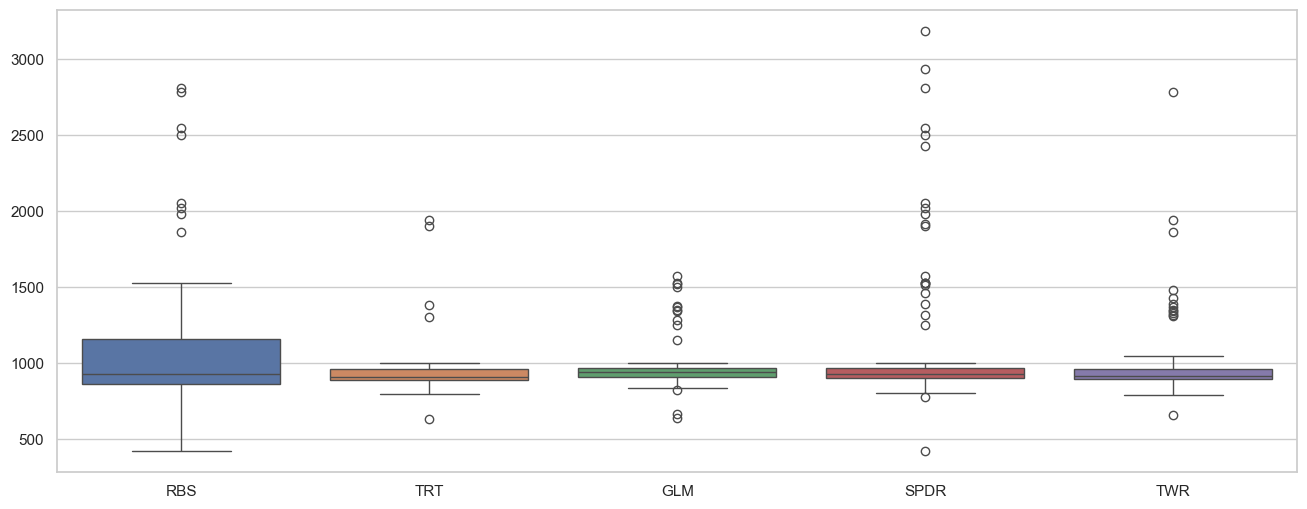

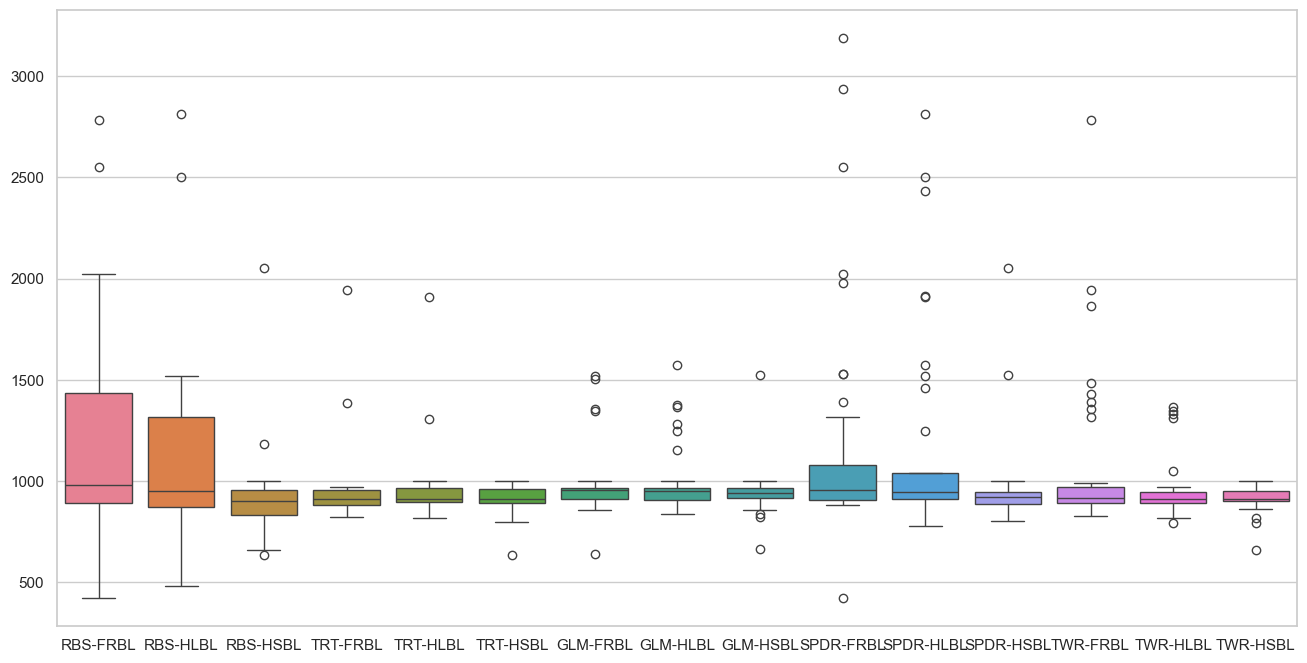

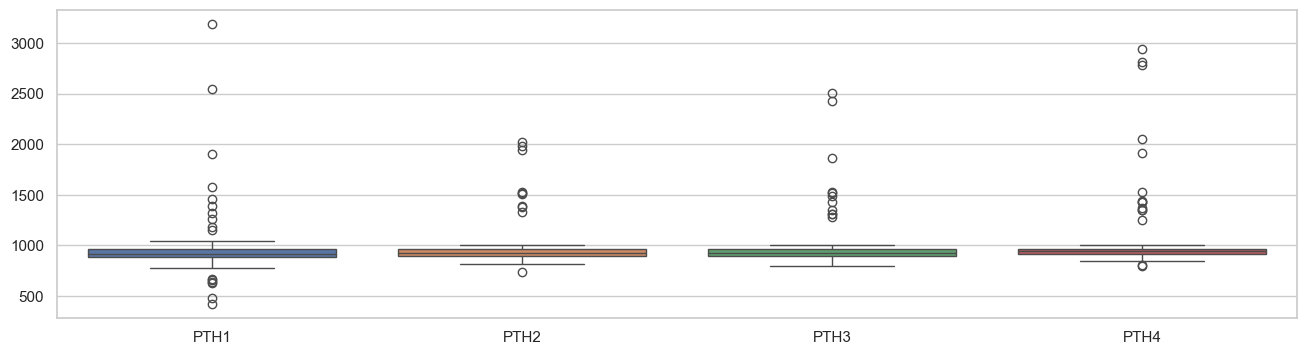

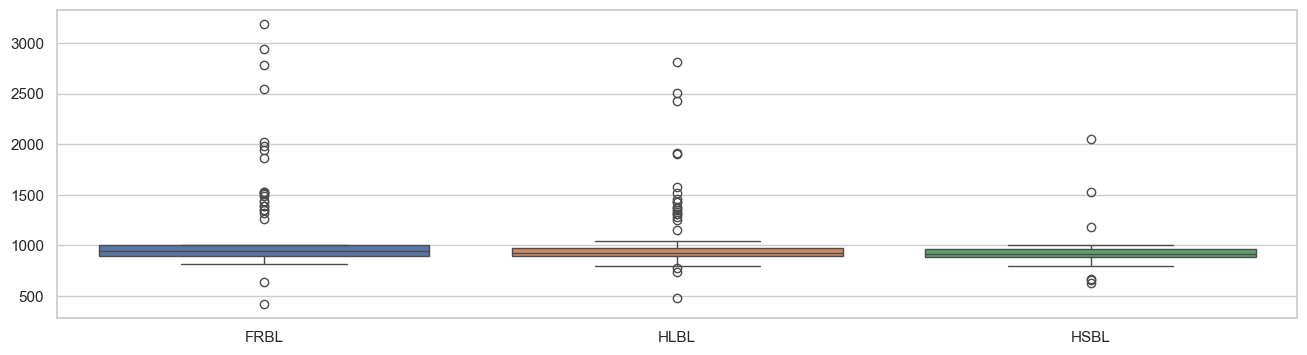

In [5]:
ranks = take_and_clean('balancerdata1', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




NAME -- MEAN   --   MED
SPDR -- 1706.10 -- 1364.00
RBS -- 1238.56 -- 1000.00
TWR -- 1081.87 -- 882.60
GLM -- 995.48  -- 820.91
TRT -- 983.63  -- 858.04
RBMB -- 825.32  -- 763.73
NAME -- MEAN   --   MED
SPDR-FRBL -- 2054.69 -- 1904.55
SPDR-HLBL -- 1726.61 -- 1591.10
RBS-FRBL -- 1348.99 -- 1000.00
SPDR-HSBL -- 1336.52 -- 987.93
RBS-HLBL -- 1294.30 -- 1000.00
TWR-FRBL -- 1246.47 -- 991.25
GLM-FRBL -- 1177.50 -- 1000.00
TWR-HLBL -- 1177.18 -- 944.27
TRT-FRBL -- 1111.28 -- 957.94
RBS-HSBL -- 1067.12 -- 903.61
TRT-HLBL -- 993.65  -- 886.71
GLM-HLBL -- 931.47  -- 798.12
GLM-HSBL -- 882.13  -- 778.63
RBMB-HLBL -- 864.55  -- 745.29
RBMB-FRBL -- 850.14  -- 784.03
TRT-HSBL -- 828.33  -- 794.63
TWR-HSBL -- 776.17  -- 740.63
RBMB-HSBL -- 750.03  -- 700.85


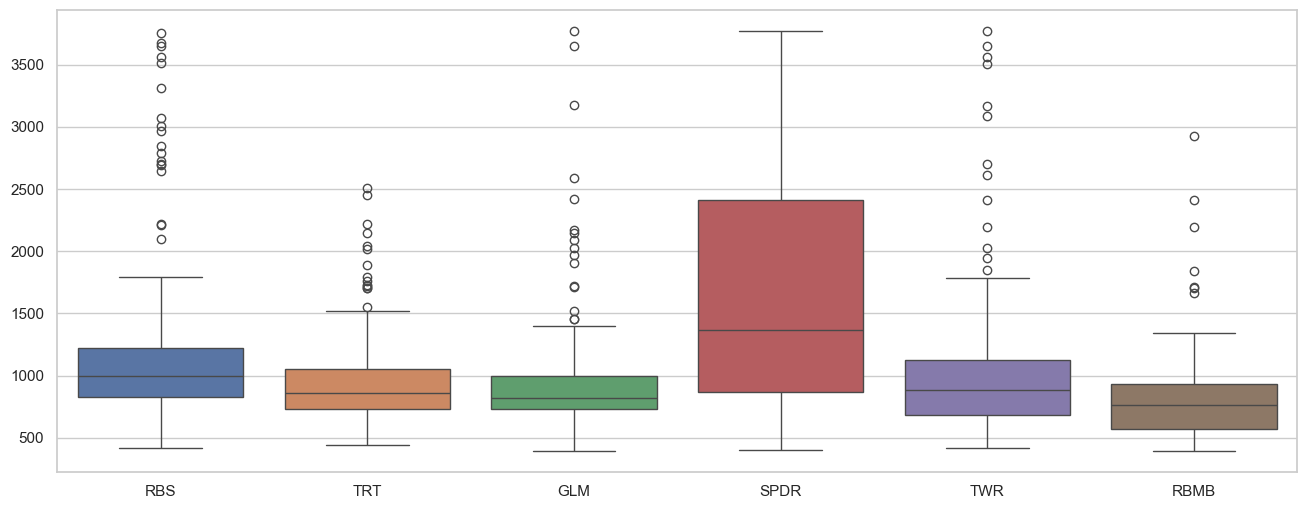

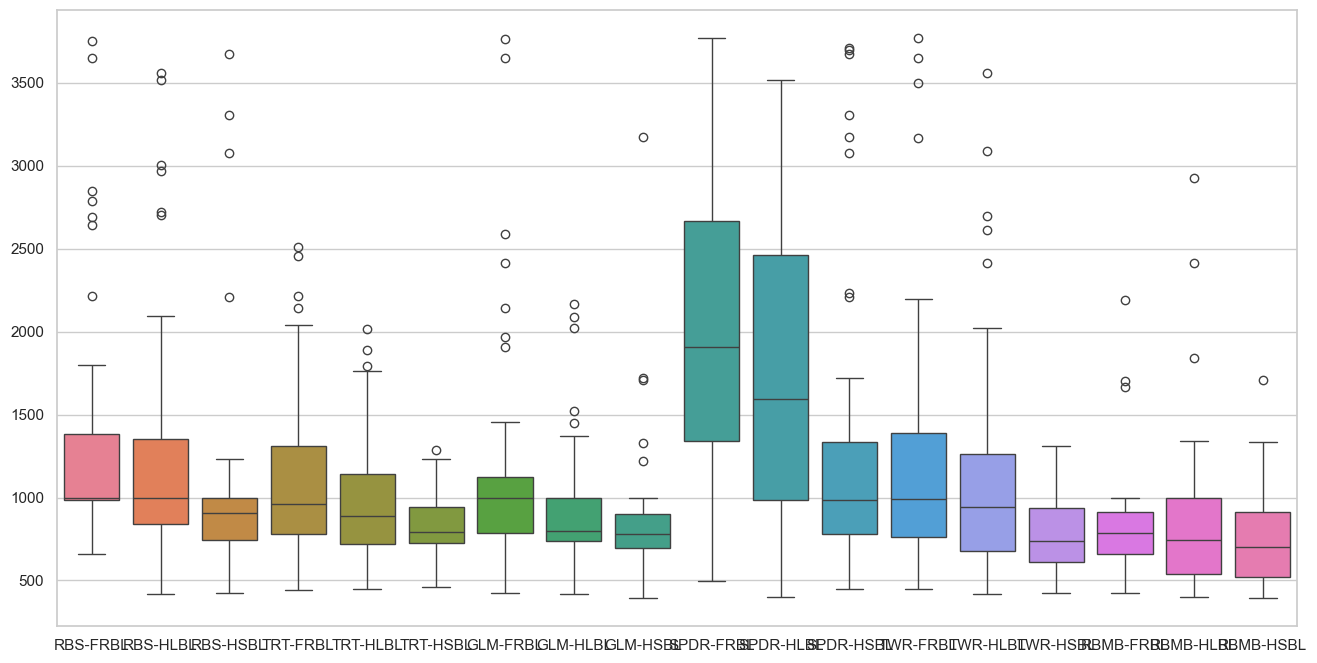

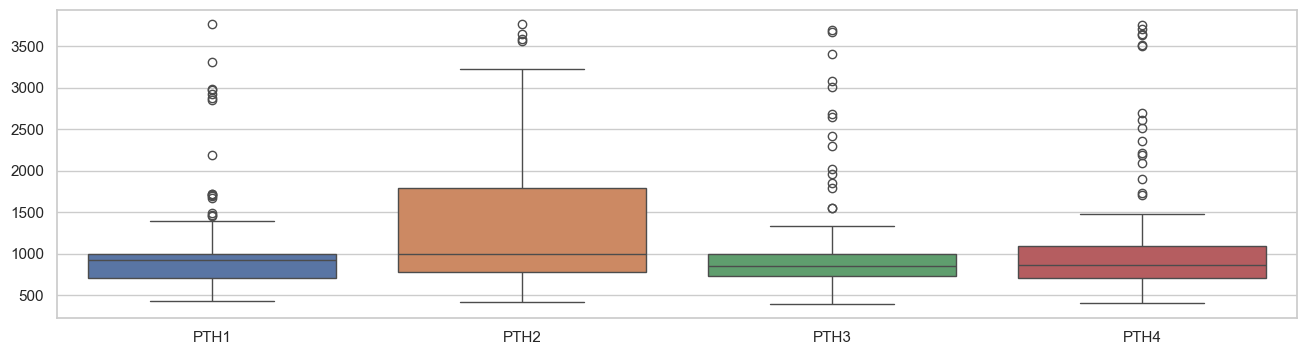

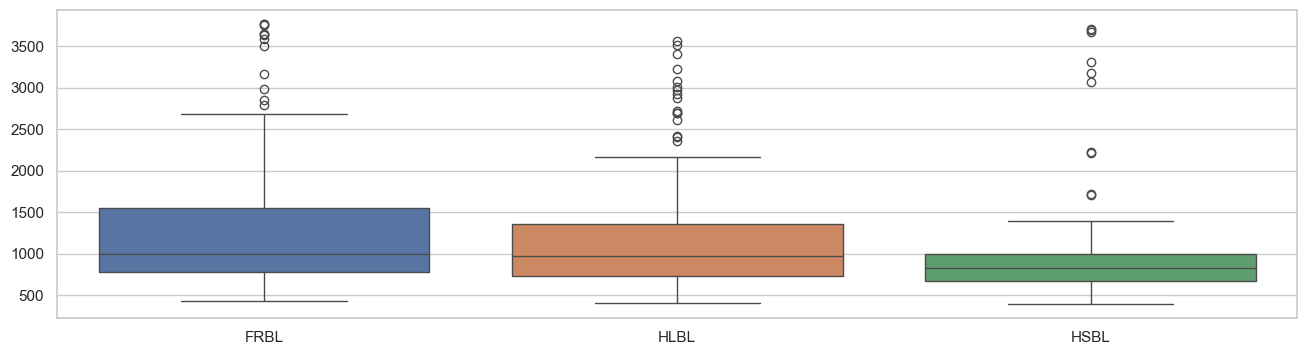

In [8]:
ranks = take_and_clean('balancerdata2', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




NAME -- MEAN   --   MED
RBMB -- 2723.20 -- 2841.45
GLM -- 2699.73 -- 2707.91
RBS -- 2547.34 -- 2572.83
SPDR -- 2491.28 -- 2325.06
TWR -- 2455.78 -- 2430.07
TRT -- 2131.16 -- 1953.96
NAME -- MEAN   --   MED
RBMB-FRBL -- 3080.66 -- 3026.03
GLM-FRBL -- 2849.07 -- 2974.74
RBS-HSBL -- 2761.28 -- 2772.54
GLM-HLBL -- 2592.70 -- 2534.61
GLM-HSBL -- 2586.47 -- 2457.39
RBS-FRBL -- 2569.47 -- 2613.90
SPDR-HSBL -- 2504.04 -- 2192.28
SPDR-HLBL -- 2495.77 -- 2385.27
TWR-FRBL -- 2488.70 -- 2493.66
SPDR-FRBL -- 2479.57 -- 2348.44
TWR-HLBL -- 2450.51 -- 2476.94
RBS-HLBL -- 2448.00 -- 2348.27
RBMB-HLBL -- 2430.76 -- 2277.75
RBMB-HSBL -- 2381.93 -- 2381.93
TRT-HLBL -- 2372.28 -- 2293.63
TWR-HSBL -- 2350.74 -- 2269.89
TRT-FRBL -- 2059.46 -- 1831.62
TRT-HSBL -- 1838.06 -- 1838.06


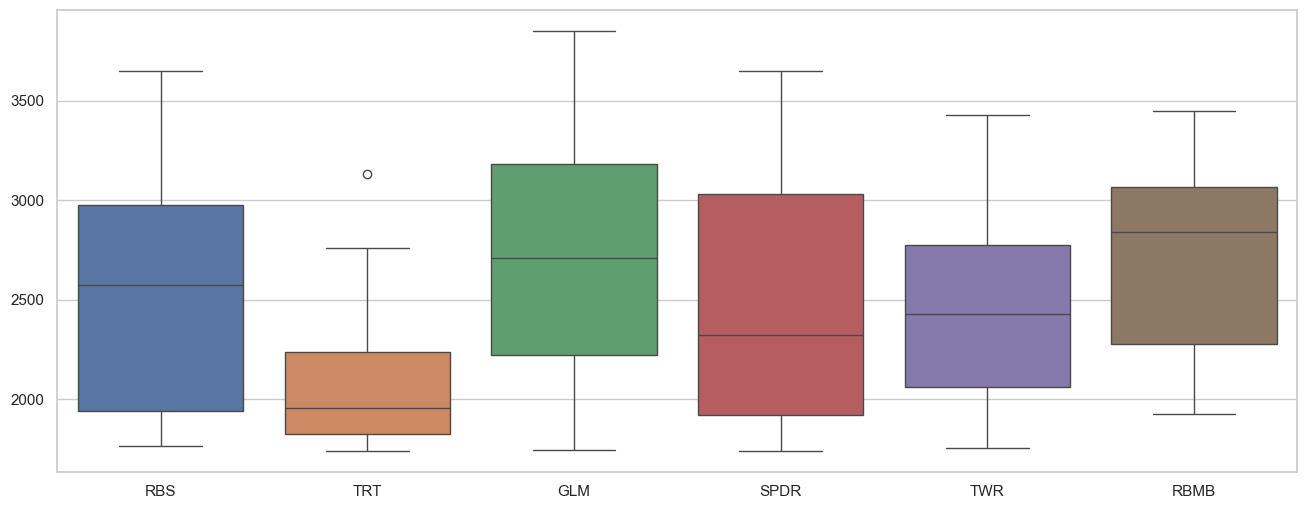

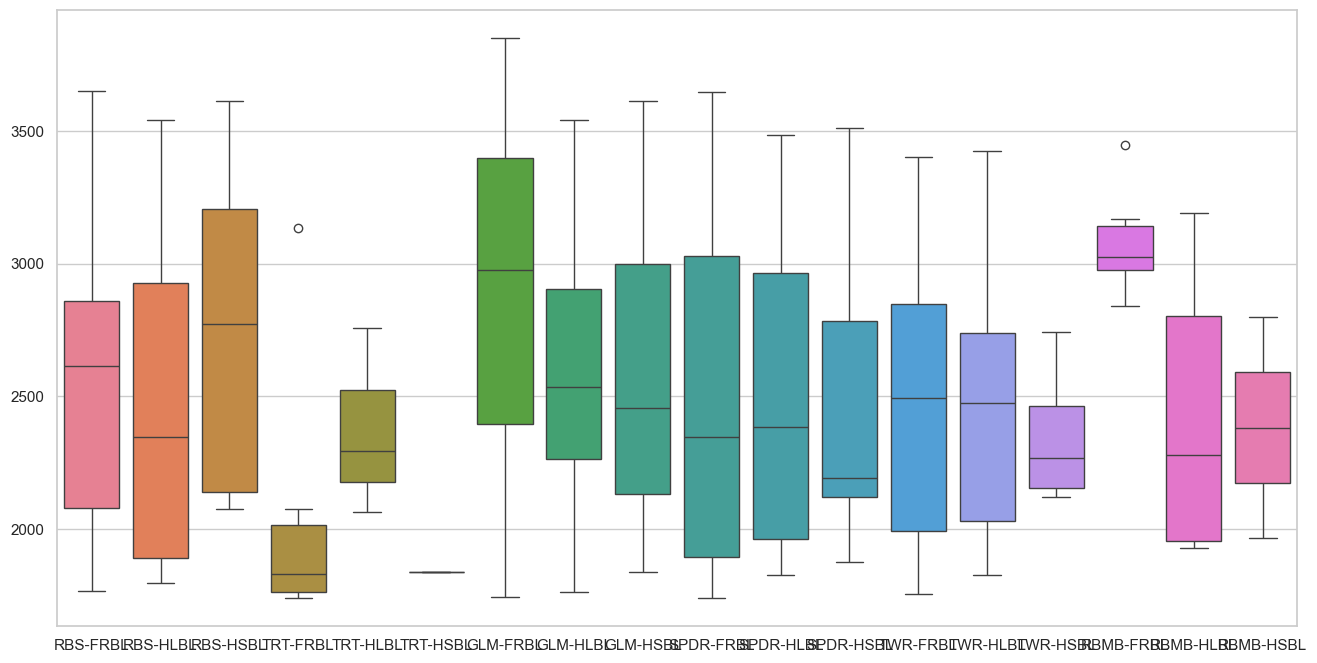

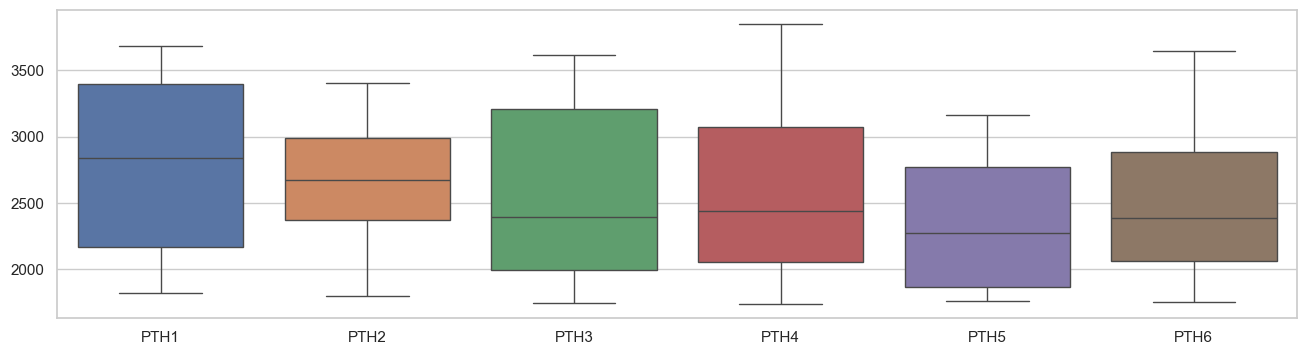

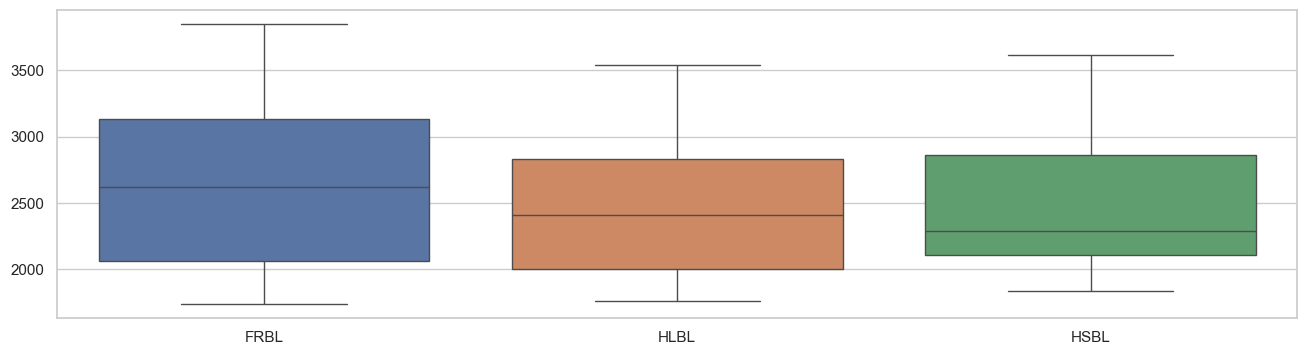

In [13]:
ranks = take_and_clean('balancerdata3', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




NAME -- MEAN   --   MED
GLM -- 2122.48 -- 2021.03
SPDR -- 1761.50 -- 1720.18
TWR -- 1555.08 -- 1152.73
RBS -- 1484.59 -- 1000.00
RBMB -- 1422.62 -- 1000.00
TRT -- 1130.82 -- 1000.00
NAME -- MEAN   --   MED
GLM-FRBL -- 2245.38 -- 2192.93
GLM-HLBL -- 2149.56 -- 2054.35
GLM-HSBL -- 1919.42 -- 1890.28
SPDR-FRBL -- 1912.12 -- 1852.47
SPDR-HLBL -- 1817.18 -- 1788.83
TWR-HLBL -- 1740.34 -- 1571.22
RBS-FRBL -- 1601.61 -- 1144.01
RBMB-FRBL -- 1550.17 -- 1000.00
TWR-FRBL -- 1541.65 -- 1000.00
RBMB-HLBL -- 1538.75 -- 1332.71
RBS-HLBL -- 1511.94 -- 1000.00
SPDR-HSBL -- 1444.66 -- 1000.00
TRT-FRBL -- 1257.87 -- 1000.00
RBS-HSBL -- 1256.41 -- 1000.00
TWR-HSBL -- 1202.41 -- 845.38
TRT-HLBL -- 1125.01 -- 1000.00
RBMB-HSBL -- 1081.23 -- 929.53
TRT-HSBL -- 939.86  -- 1000.00


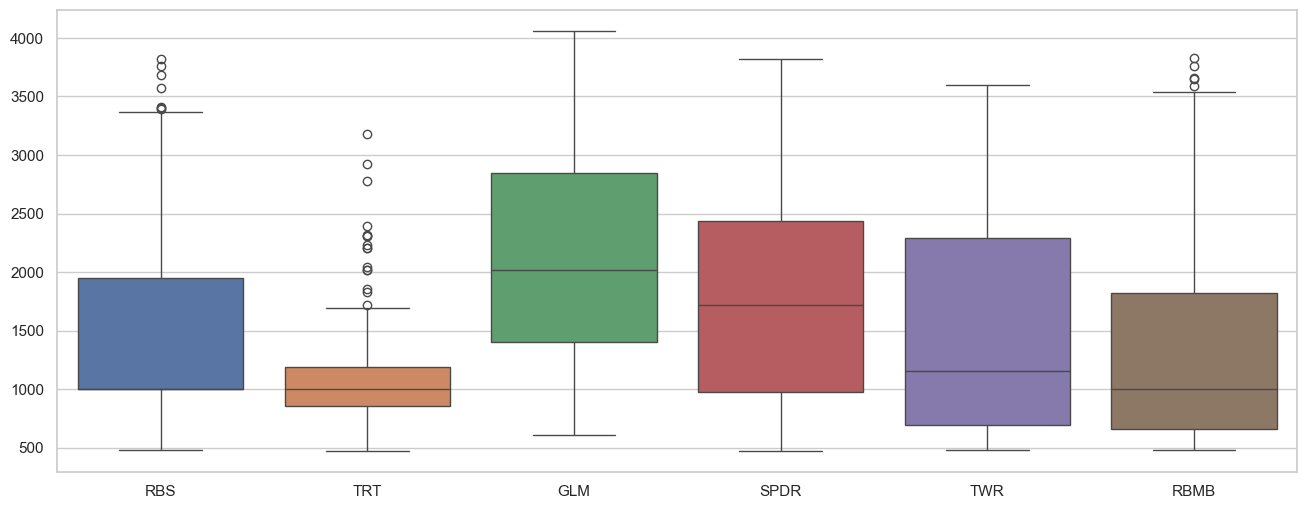

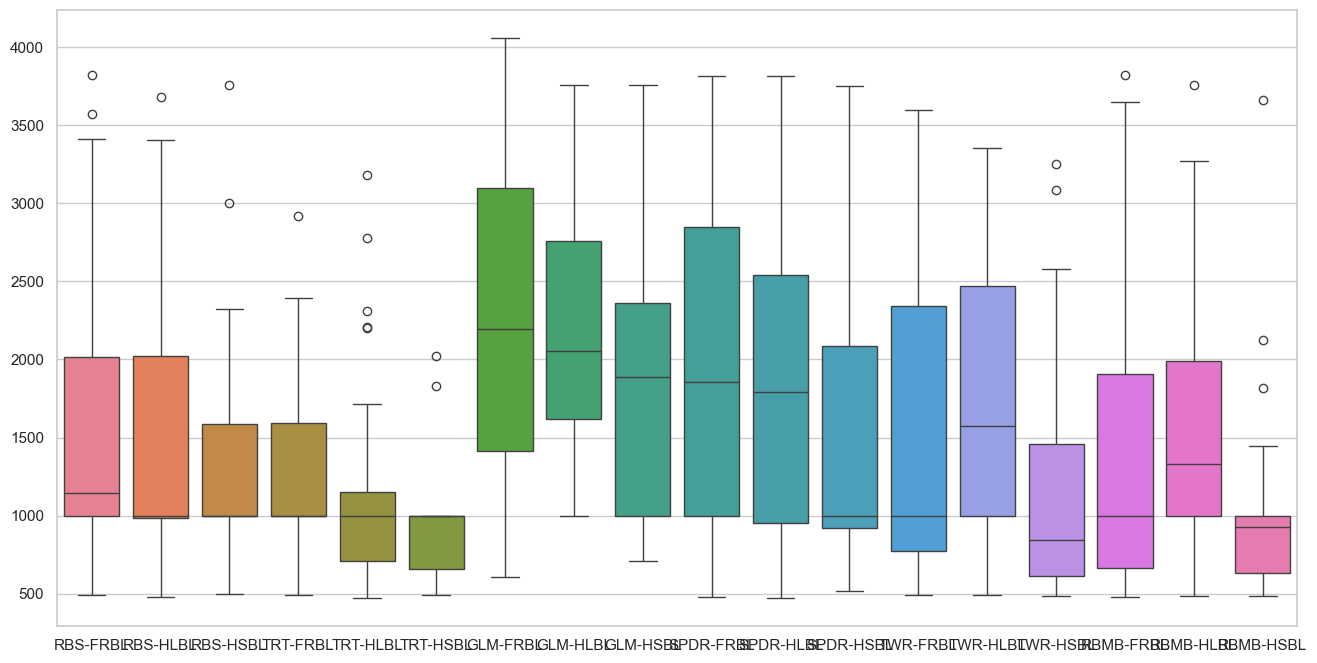

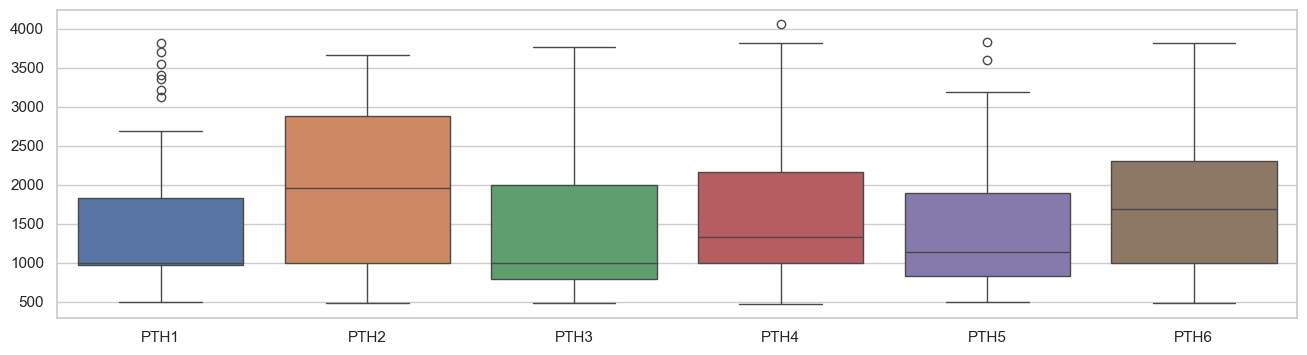

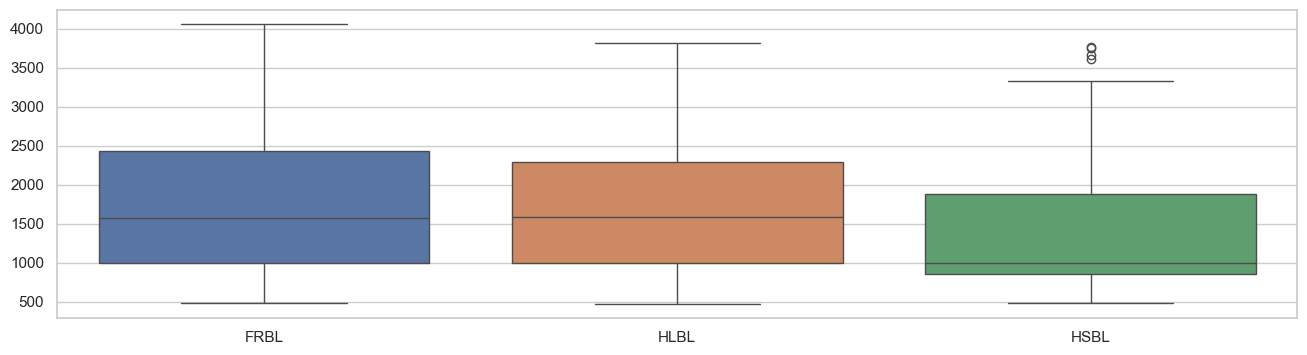

In [4]:
ranks = take_and_clean('balancerdata4', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




In [ ]:
ranks = take_and_clean('balancerdata5', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)


